# PROJECT DATA MINING ASSOCIATION RULE


Nama anggota kelompok:
- Hutari Andini 2206820680
- Nadhif Maulandra
- Yiesha Reyhani Ghozali 2206828115
- Daffa Taufiqurohman Purwoko 2206053846

Dataset: https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket/data

Dataset ini merupakan dataset dari suatu toko roti yang berlokasi di Edinburgh. Dataset ini memiliki 20507 entries, dengan lebih dari 9000 transaksi, dan juga 4 kolom.

Dataset ini berisi data transaksi pelanggan yang melakukan pembelian secara online dari toko roti di Edinburgh dari tanggal 2016-10-30 sampai 2017-04-09.

In [ ]:
#Melakukan import library yang akan digunakan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#Membaca dataset, disini kita melakukan upload dataset melalui menu upload yang tersedia pada Google Colab
df=pd.read_csv('/content/bread basket.csv')
df.head() #Melihat 5 data pertama pada dataset

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


#EDA

In [ ]:
#Melihat informasi umum mengenai variabel yang terdapat dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


Dataset ini memiliki variabel:
- Transaction: Data ID transaksi yang memiliki nilai unik pada tiap observasi
- Item: List barang yang dibeli oleh customer pada masing-masing transaksi
- date_time: Tanggal dan waktu transaksi dilakukan. Format: dd-mm-yyyy hh:mm
- period_day: Periode hari dimana pelanggan melakukan pemesanan. (morning, afternoon, other).
- weekday_weekend: Hari pembelian (weekday/weekend).

In [ ]:
# Conversion from Object to Datetime
df['date_time'] = pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


<ipython-input-29-b5198b32e4ed>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


Didapatkan bahwa 5 variabel yang dimiliki oleh dataset terdapat variabel transaksi yang bentuk datanya adalah integer, item yang bentuk datanya adalah object (character), date_time yang merupakan variabel dengan bentuk data waktu, period_day dengan bentuk data object, dan juga weekday_weekend yang bentuk datanya object.

In [ ]:
# Melihat unique values dari kolom item, period_day, dan weekday_weekend
unique_item = df['Item'].unique()
unique_period_day = df['period_day'].unique()
unique_weekday_weekend = df['weekday_weekend'].unique()

print("Unique Items:", unique_item)
print("Unique Period Day:", unique_period_day)
print("Unique Weekday/Weekend:", unique_weekday_weekend)

Unique Items: ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbread sa

In [ ]:
# Cek Missing Value
df.isnull().sum()

,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


Tidak ditemukan missing values pada dataset ini.

In [ ]:
# Cek Data Duplikat
df.duplicated().sum()

1620

Terdapat 1620 duplikasi dalam data ini, maka akan dihapus.

In [ ]:
# Hapus data duplikat
df = df.drop_duplicates()
print(df.duplicated().sum())

0


Setelah didrop dan dilakukan pengecekan ulang, didapatkan bahwa hasil akhir dari datasetnya sudah tidak mengandung data yang duplikat lagi.

## Top 10 Sold Item

In [ ]:
df['weekday_weekend'].unique()

array(['weekend', 'weekday'], dtype=object)

In [ ]:
df_weekend = df[df['weekday_weekend']=='weekend']
df_weekday = df[df['weekday_weekend']=='weekday']
df_weekend = df_weekend.drop(columns='weekday_weekend')
df_weekday = df_weekday.drop(columns='weekday_weekend')

dfs = [df,df_weekday,df_weekend] #Put all df into one list, just interate through all if want to manipulate

In [ ]:
item_counts = []
for i in dfs:
  item_counts.append(i['Item'].value_counts().head(10))

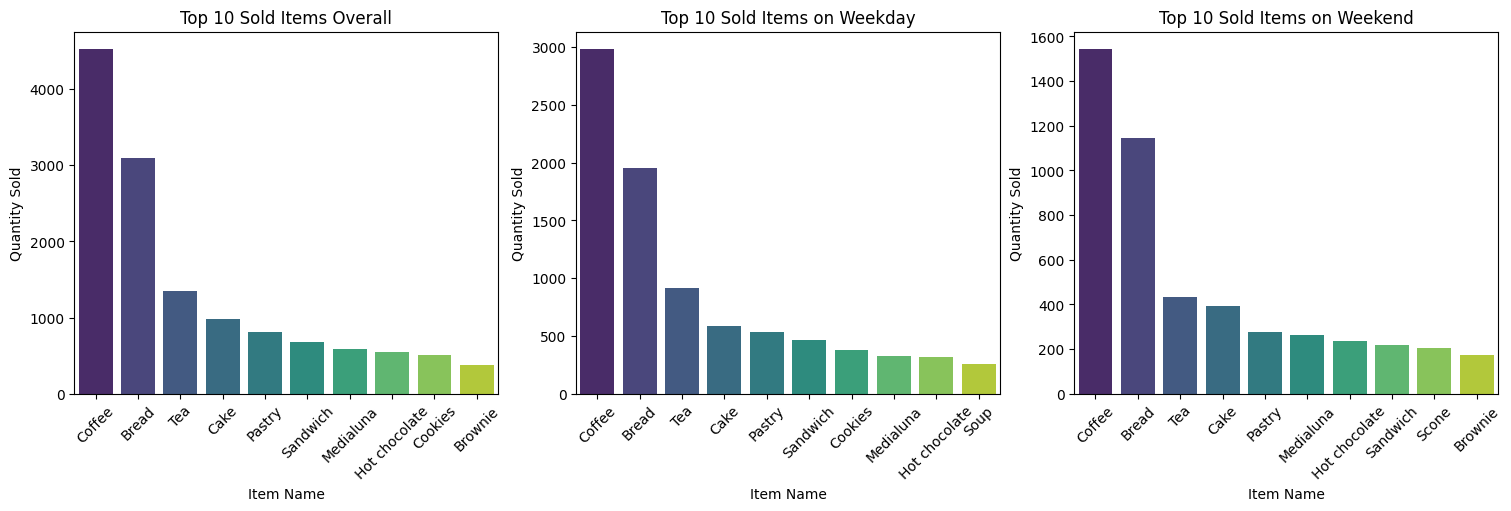

In [ ]:
# Membuat subplot dengan 1 baris dan 3 kolom
fig, axs = plt.subplots(1, 3, layout='constrained')
fig.set_figheight(5)  # Mengatur tinggi figure
fig.set_figwidth(15)   # Mengatur lebar figure
count = 0

# Menggambar grafik
for j in range(3):  # Menggunakan 3 kolom
    sns.barplot(x=item_counts[count].index, y=item_counts[count].values, palette="viridis", ax=axs[j])
    axs[j].set_xlabel('Item Name')
    axs[j].set_ylabel('Quantity Sold')
    axs[j].tick_params(axis='x', labelrotation=45)
    count += 1

# Menambahkan judul untuk setiap subplot
axs[0].set_title('Top 10 Sold Items Overall')
axs[1].set_title('Top 10 Sold Items on Weekday')
axs[2].set_title('Top 10 Sold Items on Weekend')

# Menampilkan grafik
plt.show()

Insights :
- Secara keseluruhan, jenis produk yang paling sering dibeli adalah Coffee, Bread, dan juga Tea.
- Pada hari weekday, jenis produk yang paling sering dibeli adalah masih sama, yakni Coffee, Bread, dan juga Tea.
- Pada hari weekend, sama pada hari weekday, barang yang paling sering dibeli juga adalah Coffee, Bread, dan juga Tea.

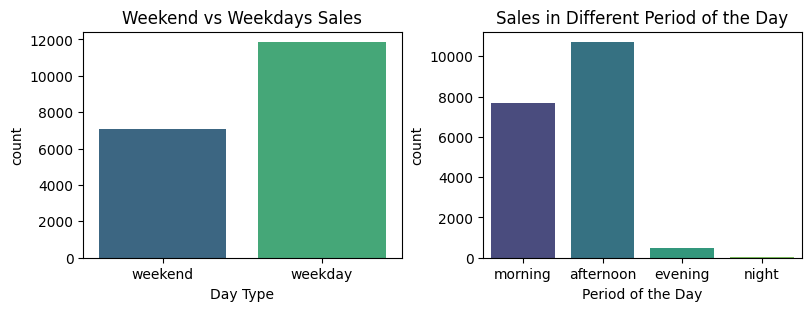

In [ ]:
# Mengatur ukuran figure
plt.figure(figsize=(8, 3), constrained_layout=True)

# Subplot pertama
plt.subplot(1, 2, 1)
sns.countplot(x='weekday_weekend', data=df, palette="viridis")
plt.title('Weekend vs Weekdays Sales')
plt.xlabel('Day Type')

# Subplot kedua
plt.subplot(1, 2, 2)
sns.countplot(x='period_day', data=df, palette="viridis")
plt.title('Sales in Different Period of the Day')
plt.xlabel('Period of the Day')

# Menampilkan grafik
plt.show()

Insights :
- Jumlah penjualan lebih banyak pada weekday dibandingkan weekend
- Jumlah penjualan terbanyak pada afternoon dan morning, dan jumlah penjualan paling sedikit pada night.

## Top 10 Items Sold by Period of Day

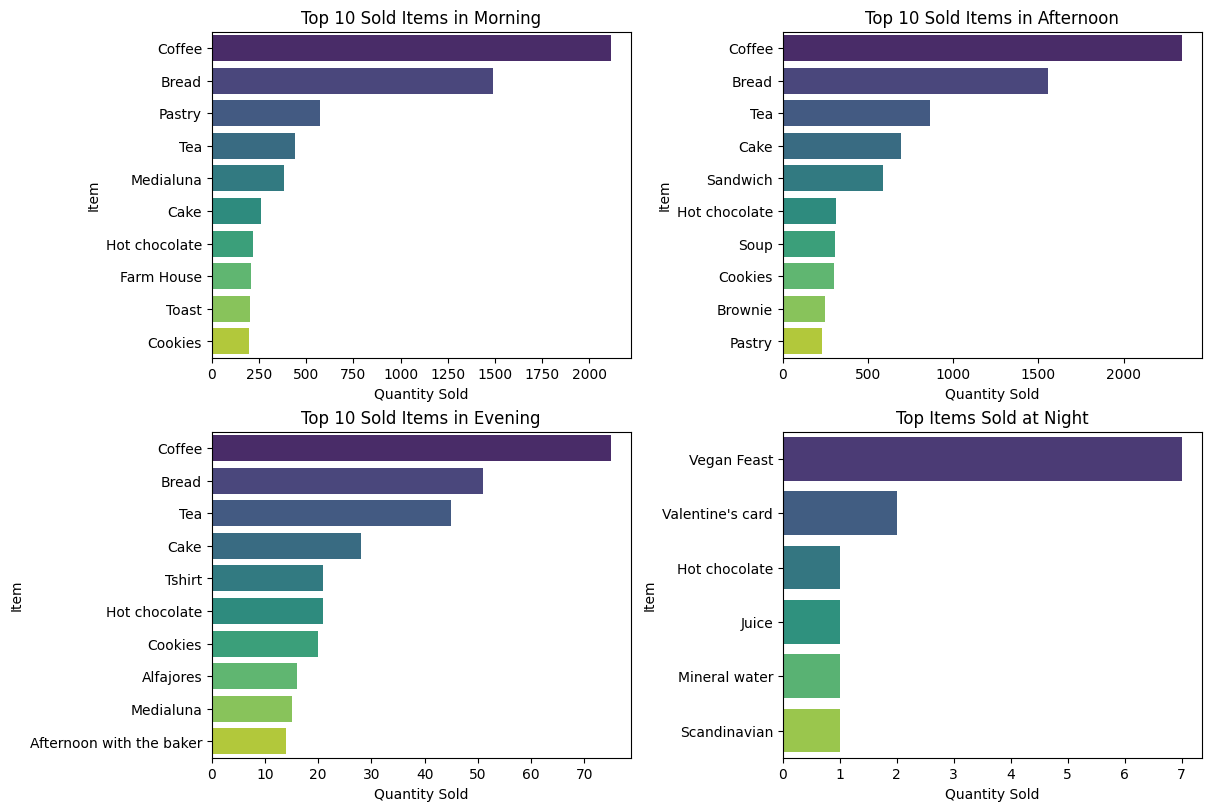

In [ ]:
plt.figure(figsize=(12, 8), constrained_layout=True)

# Daftar periode waktu
periods = ['morning', 'afternoon', 'evening', 'night']

# Menggambar subplot untuk setiap periode waktu menggunakan loop
for idx, period in enumerate(periods):
    plt.subplot(2, 2, idx + 1)
    top_items = df[df['period_day'] == period]['Item'].value_counts().nlargest(10) #10 item terbanyak yang terjual
    sns.barplot(y=top_items.index, x=top_items.values, palette="viridis")

    # Judul Grafik
    if period == 'night':
        plt.title('Top Items Sold at Night')
    else:
        plt.title(f'Top 10 Sold Items in {period.capitalize()}')
    plt.xlabel('Quantity Sold')
    plt.ylabel('Item')

plt.show()

Insights :
- Pada pagi, siang, maupun sore hari produk yang paling banyak terjual adalah coffee, bread, dan tea.
- Pada malam hari, produk yang paling banyak terjual adalah vegan feast dan valentine's card.

In [ ]:
df_date=[]
for dataset in dfs:
  df_date.append(dataset.set_index(['date_time'])) # Changed i to dataset

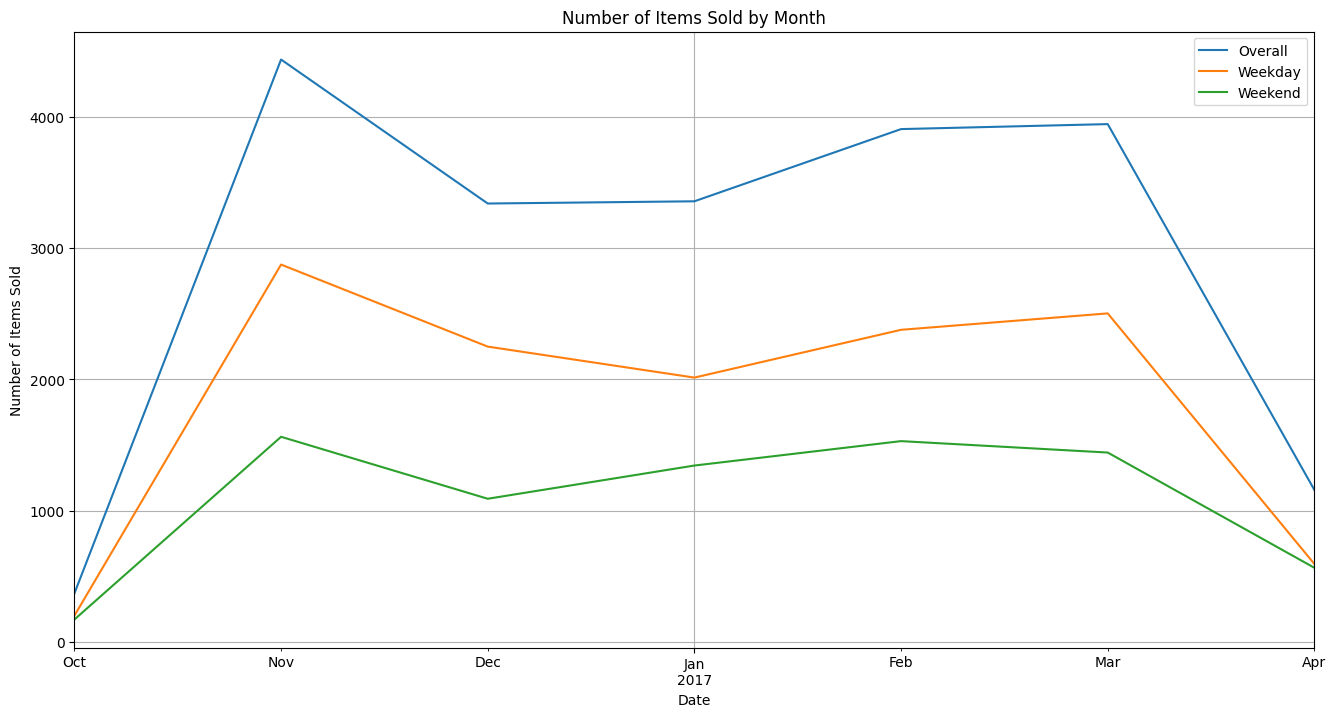

In [ ]:
fig,ax=plt.subplots()

for dates in df_date:
  dates.resample("M")['Item'].count().plot(
    figsize=(16, 8),
    grid=True,
    title="Number of Items Sold by Month").set(xlabel="Date", ylabel="Number of Items Sold")

ax.legend(['Overall','Weekday','Weekend'])

plt.show()

Insight :
- Secara keseluruhan, tren pembelian dari bulan Oktober hingga bulan April pada toko roti ini mengalami kenaikan dan penurunan penjualan. Naik dari bulan Oktober ke November dan Januari ke Maret. Dan terjadi penurunan yang cukup ekstrim pada bulan November ke Desember dan Maret ke April.
- Penjualan paling banyak terjadi di bulan November, disusul bulan Februari dan Maret. Kemungkinan toko ini mengalami kenaikan penjualan pada bulan Februari karena orang-orang ingin merayakan Valentine, mengingat toko ini juga menjual valentine's card.
- Kecilnya penjualan pada bulan Oktober kemungkinan besar karena data ini hanya memiliki data untuk 2 hari terakhir, yaitu 30 dan 31 Oktober. Begitupun dengan bulan April yang hanya memiliki 9 hari di dataset, yaitu 1 - 9 April.
- Tren penjualan pada hari weekday lebih tinggi dibandingkan hari weekend. Wajar karena jumlah hari weekday lebih banyak dibandingkan hari weekend.

# Association Rule

Apriori

In [ ]:
basket=[]
for dataset in dfs:
  basket.append(dataset.groupby(['Transaction','Item'])["date_time"].count().unstack().reset_index().fillna(0).set_index('Transaction'))

basket[0].head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1

for i in range(len(dfs)):
  basket[i] = basket[i].applymap(encode_units)

basket[0].head()

<ipython-input-33-d348f6fc3254>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket[i] = basket[i].applymap(encode_units)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Transaksi 2 membeli sebanyak 3 produk
basket[0].iloc[2].sum()

3

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
#Apriori
df_trans=[]
frequent_itemsets=[]
for i in range(len(dfs)):
  df_trans.append(pd.DataFrame(basket[i]))
  frequent_itemsets.append(apriori(df_trans[i], min_support=0.02, use_colnames=True).sort_values(by="support", ascending=False))

frequent_itemsets[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

,support,itemsets
4,0.478394,(Coffee)
1,0.327205,(Bread)
16,0.142631,(Tea)
3,0.103856,(Cake)
20,0.090016,"(Coffee, Bread)"
11,0.086107,(Pastry)
12,0.071844,(Sandwich)
9,0.061807,(Medialuna)
7,0.058320,(Hot chocolate)
23,0.054728,"(Coffee, Cake)"


In [ ]:
rules_list = []

for i in range(len(frequent_itemsets)):
  rules = association_rules(frequent_itemsets[i], metric="lift", min_threshold=1)
  rules = rules[(rules['confidence'] > 0.5)]

  rules = rules.sort_values(['confidence'],ascending=False).reset_index(drop=True)

  rules_list.append(rules)

rules_list[0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
1,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
2,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
3,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
4,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
5,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
7,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403


In [ ]:
def frequently_bought_together(item,basket):

    # df of item passed
    item_df = basket.loc[basket[item]==1]

    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.01, use_colnames=True)

    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
    rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))

    rules = rules[(rules['antecedent_len'] == 1) & (rules['consequents_len'] == 1) & (rules['lift'] > 1)]

    # Sorting on lift and support
    rules.sort_values(['confidence'],ascending=False).reset_index(drop=True)

    print('Items frequently bought together with {0}'.format(item))

    bt = rules['consequents'].drop_duplicates()

    # Returning top 6 items with highest lift and support
    return bt

In [ ]:
frequently_bought_together('Coffee',basket=basket[0])

Items frequently bought together with Coffee


,consequents
4,(Bread)
5,(Hot chocolate)
7,(Medialuna)
9,(Pastry)
15,(Cake)
17,(Tea)
66,(Sandwich)


Cara lain:

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
transactions = []
for dataframe in dfs:
  transactions.append(dataframe.groupby('Transaction')['Item'].apply(list).tolist())

In [ ]:
print(transactions[0])

[['Bread'], ['Scandinavian'], ['Hot chocolate', 'Jam', 'Cookies'], ['Muffin'], ['Coffee', 'Pastry', 'Bread'], ['Medialuna', 'Pastry', 'Muffin'], ['Medialuna', 'Pastry', 'Coffee', 'Tea'], ['Pastry', 'Bread'], ['Bread', 'Muffin'], ['Scandinavian', 'Medialuna'], ['Bread', 'Medialuna'], ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'], ['Basket', 'Bread', 'Coffee'], ['Bread', 'Medialuna', 'Pastry'], ['Mineral water', 'Scandinavian'], ['Bread', 'Medialuna', 'Coffee'], ['Hot chocolate'], ['Farm House'], ['Farm House', 'Bread'], ['Bread', 'Medialuna'], ['Coffee', 'Medialuna', 'Bread'], ['Jam'], ['Scandinavian', 'Muffin'], ['Bread'], ['Scandinavian'], ['Fudge'], ['Scandinavian'], ['Coffee', 'Bread'], ['Bread', 'Jam'], ['Bread'], ['Basket'], ['Scandinavian', 'Muffin'], ['Coffee'], ['Coffee', 'Muffin'], ['Muffin', 'Scandinavian'], ['Tea', 'Bread'], ['Coffee', 'Bread'], ['Bread', 'Tea'], ['Scandinavian'], ['Juice', 'Tartine', 'Coffee', 'Muffin'], ['Scandinavian'], ['Bread', 'Tea'], ['Scandinavian', 

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
min_sup = 0.01 #Minimum support
min_tresh = 0.01 #Minimum treshold

te_ary = []
df2 = []
frequent_itemsets2 = []
rules2 = []
for i in range(len(transactions)):
  te_ary.append(te.fit(transactions[i]).transform(transactions[i]))
  df2.append(pd.DataFrame(te_ary[i],columns=te.columns_))

  #Apriori
  frequent_itemsets2.append(apriori(df2[i],min_support=min_sup,use_colnames=True))

  #Association Rules
  rules2.append(association_rules(frequent_itemsets2[i],metric='confidence',min_threshold=min_tresh))

In [ ]:
rules2[0].sort_values(by='support', ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
9,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
25,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
24,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
51,(Coffee),(Tea),0.478394,0.142631,0.049868,0.104240,0.730840,-0.018366,0.957142,-0.413856
50,(Tea),(Coffee),0.142631,0.478394,0.049868,0.349630,0.730840,-0.018366,0.802014,-0.300482
41,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
40,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
43,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
42,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321


In [ ]:
rules2[0][(rules2[0]['lift'] < 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Alfajores),0.327205,0.036344,0.010354,0.031644,0.870657,-0.001538,0.995145,-0.180870
1,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818,-0.133570
4,(Bread),(Brownie),0.327205,0.040042,0.010777,0.032935,0.822508,-0.002326,0.992651,-0.242849
5,(Brownie),(Bread),0.040042,0.327205,0.010777,0.269129,0.822508,-0.002326,0.920538,-0.183536
6,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923,-0.336947
7,(Bread),(Cake),0.327205,0.103856,0.023349,0.071359,0.687097,-0.010633,0.965006,-0.403653
8,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
9,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
10,(Cookies),(Bread),0.054411,0.327205,0.014474,0.266019,0.813004,-0.003329,0.916638,-0.195651
11,(Bread),(Cookies),0.327205,0.054411,0.014474,0.044236,0.813004,-0.003329,0.989354,-0.254770


In [ ]:
aturan = rules2[0][(rules2[0]['lift'] >= 1) & (rules2[0]['confidence'] >= 0.01)]
aturan.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
72,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779,0.540090
69,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401
27,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
26,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
28,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
29,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
53,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
52,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
65,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,0.336907
64,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,0.338354


Insights :

**(Cake)	--> (Tea, Coffee)**
- Lift 1.94 menunjukkan terdapat hubungan yang kuat antara Cake dan Tea, Coffee. Berarti ketika seseorang membeli cake maka mereka lebih mungkin untuk membeli Tea dan Coffee juga dibandingkan ketika tidak membeli Cake.
- Support 0.010037 menunjukkan bahwa kombinasi Cake dan Tea, Coffee hanya muncul pada sekitar 1% dari total transaksi. Ini berarti kombinasi tidak terlalu sering muncul.
- Leverage 0.004858 menunjukkan bahwa kombinasi ini lebih mungkin muncul bersama dibandingkan muncul secara independen, namun kemungkinannya cukup kecil.
- Zhang's metric 0.540090 menunjukkan asosiasi antara kedua item cukup kuat.

**(Cake)	--> (Hot chocolate)**
- Lift 1.883874 menunjukkan terdapat hubungan yang kuat antara Cake dan Hot chocolate. Berarti ketika seseorang membeli Cake maka mereka lebih mungkin untuk membeli Hot chocolate juga dibandingkan ketika tidak membeli Cake.
- Support 0.011410 menunjukkan bahwa kombinasi Cake dan Hot chocolate hanya muncul pada sekitar 1% dari total transaksi. Ini berarti kombinasi tidak terlalu sering muncul.
- Leverage 0.005354 menunjukkan bahwa kombinasi ini lebih mungkin muncul bersama dibandingkan muncul secara independen, namun kemungkinannya cukup kecil.
- Zhang's metric 0.523553 menunjukkan asosiasi antara kedua item cukup kuat.

**(Tea) -->	(Cake)**
- Lift 1.604781	menunjukkan terdapat hubungan yang cukup kuat antara Tea dan Cake. Berarti ketika seseorang membeli Tea maka mereka lebih mungkin untuk membeli Cake juga dibandingkan ketika tidak membeli Tea.
- Support 0.023772 menunjukkan bahwa kombinasi Cake dan Tea hanya muncul pada sekitar 2% dari total transaksi. Ini berarti kombinasi cukup sering muncul walaupun tidak sesering itu.
- Leverage 0.008959 menunjukkan bahwa kombinasi ini lebih mungkin muncul bersama dibandingkan muncul secara independen, namun kemungkinannya cukup kecil.
- Zhang's metric 0.439556 menunjukkan asosiasi antara kedua item cukup kuat.

**(Coffee) -->	(Bread)**
- Lift 0.575059 (dibawah 1)	menunjukkan terdapat hubungan yang cukup lemah antara Bread dan Coffee. Berarti membeli Bread kurang meningkatkan kemungkinan untuk membeli Coffee.
- Support 0.090016 menunjukkan bahwa kombinasi Coffee dan Bread muncul pada sekitar 9% dari total transaksi. Kombinasi ini adalah kombinasi yang paling sering muncul diantara seluruh data.
- Leverage -0.066517 (dibawah 1) menunjukkan bahwa kombinasi ini lebih mungkin muncul secara independen dibandingkan muncul bersama. Ini berarti meskipun kombinasi tersebut sering muncul, hubungan antara kedua item tidak cukup kuat.
- Zhang's metric -0.523431, nilai negatif menunjukkan asosiasi antara kedua item cukup lemah/kedua item tidak saling mempengaruhi.


Berdasarkan hasil aturan yang sudah disortir dan beberapa aturan yang diinterpretasikan, terlihat bahwa kombinasi dengan asosiasi kuat (lift > 1) adalah kombinasi antara makanan/snacks seperti Cake, Toast, Pastry, Sandwich beserta dengan minuman seperti Coffee, Tea, atau Hot Chocolate. Hal ini kemungkinan karena pelanggan merasa lebih praktis untuk membeli makanan dan minuman sekaligus serta mereka merasa produk itu lebih nikmat jika dikonsumsi bersamaan.


Namun, tidak semua kombinasi makanan + minuman memiliki asosiasi yang kuat. Terdapat juga kombinasi dengan asosiasi lemah seperti Coffee dan Bread. Pelanggan juga cenderung jarang membeli 2 minuman/2 makanan dalam satu transaksi.




Rekomendasi :
- Toko dapat membuat penawaran bundling 1 makanan/snacks + 1 minuman berdasarkan pilihan pelanggan masing-masing.
Dapat dibuat bundling "Sarapan Nikmat" yang berisi Sandwich dan Teh. Atau dapat juga membuat menu bundling "Snack Sore" yang berisi Cake dan Hot Chocolate.

- Melakukan promo dengan kombinasi produk yang memiliki asosiasi kuat.
Kita dapat memanfaatkan kombinasi produk dari Cake dengan Tea atau dengan Hot Chocolate. Dapat dibuat promo, "Buy 1 Cake, Get 50% Off for Hot Chocolate".

- Melakukan penempatana produk yang sering dikonsumsi bersama, seperti terdapat Tea di cooler display lalu di sampingnya bisa diletakkan Cake yang cocok untuk dijadikan menu complementary untuk teh. Pada platform perbelanjaan online milik bakery, dapat dimunculkan menu "Frequently Bought Together" atau terapkan algoritma untuk bisa memunculkan barang lain yang memiliki asosiasi kuat, seperti saat membeli Tea dapat dimunculkan Cake.

- Melakukan penawaran produk yang lebih inovatif untuk meningkatkan penjualan item yang jarang untuk pelanggan beli.
Didapatkan bahwa kombinasi Kopi dengan Roti menunjukkan hubungan asosiasi yang lemah, maka harus dilakukan inovasi produk dengan membuat roti yang lebih menarik dan lebih cocok untuk dimakan bersamaan dengan Kopi. Sehingga nantinya dapat dibuat promo bundling juga untuk memunculkan roti bersamaan dengan kopi.

- Melakukan program loyalitas untuk customer, ketika mereka akan mendapatkan poin tambahan atau hadiah jika membeli kombinasi item tertentu. Seperti pada saat membeli promo bundling yang telah ditetapkan, dapat diberikan poin tambahan atau hadiah khusus.

- Melakukan campaign di media sosial dengan tema "Perfect Couple" untuk mengedukasi menikmati Cake dengan Hot Chocolate.



*   Support mengukur seberapa sering item muncul dalam dataset.
*   Confidence mengukur seberapa sering antecedent dan consequent muncul bersama, relatif terhadap jumlah transaksi yang mengandung antecedent.
* Lift adalah rasio antara confidence dan support dari consequent, yang menunjukkan seberapa besar peningkatan kemungkinan terjadinya consequent jika antecedent terjadi.
* Leverage mengukur perbedaan antara frekuensi antecedent dan consequent muncul bersama dalam data dan frekuensi mereka jika independen.
* Conviction mengukur keandalan aturan dalam memprediksi consequent
* Zhang’s metric adalah ukuran lain untuk menilai kekuatan aturan.

#Tugas
Lakukan studi kasus dengan suatu data transaksi penjualan
1. Lakukan EDA dan jelaskan insight yang didapatkan
2. Terapkan teknik Association Rule dan jelaskan insight yang didapatkan. Gunakan insight tersebut untuk merancang program untuk meningkatkan penjualan

DEADLINE: Kamis, 24 Oktober 2024
Dikumpulkan dalam folder nama Kelompok masing2, berisi dataset dan file kode yang telah dilengkapi dengan deskripsi insight yang didapatkan dan program yang dirancang.


Link pengumpulan: https://drive.google.com/drive/folders/1LEwEnTqfaJgCo5_gjjaGSJAbzskkjtoI?usp=sharing
